In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

In [514]:
data = pd.read_csv('/content/drive/MyDrive/raw_house_data.csv .csv')

In [515]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [516]:
data.shape

(5000, 16)

In [517]:
data.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [518]:
data.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [519]:
data.describe()

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,fireplaces
count,5.000000e+03,5.000000e+03,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4975.000000
mean,2.127070e+07,7.746262e+05,85723.025600,4.661317,9.402828e+03,1992.32800,3.933800,1.885226
std,2.398508e+06,3.185556e+05,38.061712,51.685230,1.729385e+05,65.48614,1.245362,1.136578
min,3.042851e+06,1.690000e+05,85118.000000,0.000000,0.000000e+00,0.00000,1.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,0.580000,4.803605e+03,1987.00000,3.000000,1.000000
50%,2.161469e+07,6.750000e+05,85737.000000,0.990000,6.223760e+03,1999.00000,4.000000,2.000000
75%,2.180480e+07,8.350000e+05,85749.000000,1.757500,8.082830e+03,2006.00000,4.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,2154.000000,1.221508e+07,2019.00000,36.000000,9.000000


In [520]:
corr = data.corr()
corr

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,fireplaces
MLS,1.000000,0.031019,0.323165,-0.084742,0.003306,-0.003144,-0.012254,-0.062502
sold_price,0.031019,1.000000,-0.039925,0.332357,0.023326,-0.014064,0.115932,0.384388
zipcode,0.323165,-0.039925,1.000000,-0.127783,-0.001265,0.037776,0.049982,-0.017290
lot_acres,-0.084742,0.332357,-0.127783,1.000000,-0.000571,-0.039552,0.069277,0.086382
taxes,0.003306,0.023326,-0.001265,-0.000571,1.000000,0.000021,0.005259,0.022555
year_built,-0.003144,-0.014064,0.037776,-0.039552,0.000021,1.000000,-0.086302,-0.032150
bedrooms,-0.012254,0.115932,0.049982,0.069277,0.005259,-0.086302,1.000000,0.145481
fireplaces,-0.062502,0.384388,-0.017290,0.086382,0.022555,-0.032150,0.145481,1.000000


In [521]:
data['bathrooms'].value_counts()

3       1993
4       1842
5        654
6        207
2        189
7         58
8         19
9          8
3.5        7
None       6
1          3
2.5        3
35         3
11         2
10         1
14         1
18         1
4.5        1
15         1
36         1
Name: bathrooms, dtype: int64

In [522]:
data['bathrooms'].replace('None', np.nan, inplace=True)
datax= data['bathrooms'].median()
data.fillna(datax, inplace= True)

In [523]:
data['bathrooms'].value_counts()

3      1993
4      1842
5       654
6       207
2       189
7        58
8        19
9         8
3.5       7
4.0       6
1         3
2.5       3
35        3
11        2
10        1
14        1
18        1
4.5       1
15        1
36        1
Name: bathrooms, dtype: int64

In [524]:
data['sqrt_ft'].value_counts()

None    56
3541    50
3052    25
3420    18
3002    16
        ..
4362     1
5586     1
5117     1
3793     1
1772     1
Name: sqrt_ft, Length: 2362, dtype: int64

In [525]:
data['sqrt_ft'].replace('None', np.nan, inplace=True)
datax= data['sqrt_ft'].median()
data.fillna(datax, inplace= True)

In [526]:
data['sqrt_ft'].value_counts()

3512.0    56
3541      50
3052      25
3420      18
3002      16
          ..
4362       1
5586       1
5117       1
3793       1
1772       1
Name: sqrt_ft, Length: 2362, dtype: int64

In [527]:
data['garage'].value_counts()

3       2797
2       1337
4        383
0        184
5         88
6         61
2.5       48
1         30
3.5       16
8         14
7         13
None       7
9          6
4.5        4
12         3
10         3
15         1
22         1
30         1
11         1
20         1
13         1
Name: garage, dtype: int64

In [528]:
data['garage'].replace('None', np.nan, inplace=True)
datax= data['garage'].median()
data.fillna(datax, inplace= True)

In [529]:
data['garage'].value_counts()

3      2797
2      1337
4       383
0       184
5        88
6        61
2.5      48
1        30
3.5      16
8        14
7        13
3.0       7
9         6
4.5       4
12        3
10        3
15        1
22        1
30        1
11        1
20        1
13        1
Name: garage, dtype: int64

In [530]:
data['HOA'].value_counts()

0         824
None      562
5         123
100       107
50         85
         ... 
178         1
69.16       1
332.67      1
43.01       1
78.65       1
Name: HOA, Length: 378, dtype: int64

In [531]:
data['HOA'].replace('None', np.nan, inplace=True)

In [532]:
data['HOA'].value_counts()

0         824
5         123
100       107
50         85
40         72
         ... 
178         1
69.16       1
332.67      1
43.01       1
78.65       1
Name: HOA, Length: 377, dtype: int64

In [533]:
for HOA in data:
  data['HOA'].unique()

In [534]:
data['HOA'] = data['HOA'].replace(',','', regex=True)
datax= data['HOA'].median()
data.fillna(datax, inplace= True)

In [535]:
data['HOA'].value_counts()

0         824
55.0      562
5         123
100       107
50         85
         ... 
188.33      1
149.5       1
73.72       1
50.42       1
78.65       1
Name: HOA, Length: 371, dtype: int64

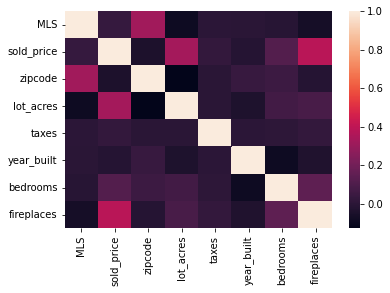

In [536]:
sns.heatmap(data = corr)

In [537]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3,3512.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",55.0
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",55.0
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [538]:
data['sqrt_ft'] = data.sqrt_ft.astype(float)
data['bathrooms'] = data.bathrooms.astype(float)
data['garage'] = data.garage.astype(float)
data['HOA'] = data.HOA.astype(float)
#data['zipcode'] = data.zipcode.astype(float)
#data['bedrooms'] = data.bedrooms.astype(float)

In [539]:
data.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [540]:
data['floor_covering'].value_counts()

Carpet, Ceramic Tile                           1235
Carpet, Natural Stone                           579
Carpet, Ceramic Tile, Wood                      258
Ceramic Tile                                    247
Concrete                                        242
                                               ... 
Carpet, Concrete, Wood, Other: travertine         1
Concrete, Wood, Other: Mesquite wood floors       1
Carpet, Ceramic Tile, Wood, Other: Slate          1
Carpet, Other: brick pavers                       1
Concrete, Other: Cork                             1
Name: floor_covering, Length: 311, dtype: int64

In [541]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",55.0
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",55.0
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0


In [542]:
data.describe()

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,4.659994,9.402828e+03,1992.32800,3.933800,3.830100,3714.077920,2.816400,1.895800,82.274618
std,2.398508e+06,3.185556e+05,38.061712,51.633517,1.729385e+05,65.48614,1.245362,1.386243,1114.596305,1.192131,1.143505,151.842160
min,3.042851e+06,1.690000e+05,85118.000000,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3051.000000,2.000000,1.000000,13.750000
50%,2.161469e+07,6.750000e+05,85737.000000,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,2.000000,55.000000
75%,2.180480e+07,8.350000e+05,85749.000000,1.770000,8.082830e+03,2006.00000,4.000000,4.000000,4120.000000,3.000000,3.000000,122.000000
max,2.192856e+07,5.300000e+06,86323.000000,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000,9.000000,8333.000000


In [543]:
def class_price(sold_price):
  if sold_price <=500000:
    return 1
  if sold_price <=1500000 >=500001:
    return 2
  if sold_price <=5000000 >=1500001:
    return 3
  if sold_price <=10000000 >=5000001:
    return 4


In [544]:
data['class_price'] = data [["sold_price"]].apply (lambda x : class_price(*x), axis=1)

In [545]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,class_price
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,4
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,3
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",55.0,3
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",55.0,3
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,3


In [546]:
data['class_price'].value_counts()

2    4775
3     165
1      59
4       1
Name: class_price, dtype: int64

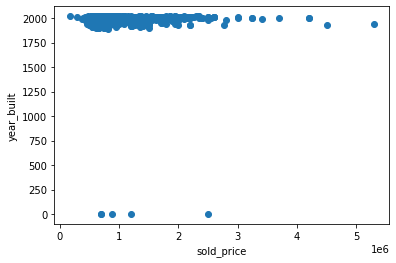

In [547]:
plt.scatter(data['sold_price'], data['year_built'])
plt.xlabel('sold_price')
plt.ylabel('year_built')
plt.show()

In [548]:
data['year_built'].value_counts()

2006    247
2007    236
2002    235
2005    230
2004    202
       ... 
1913      1
1923      1
1907      1
1911      1
1927      1
Name: year_built, Length: 112, dtype: int64

In [549]:
X= data[['sold_price', 'zipcode', 'bedrooms', 'bathrooms', 'sqrt_ft', 'class_price']].copy()

In [550]:
X

,sold_price,zipcode,bedrooms,bathrooms,sqrt_ft,class_price
0,5300000.0,85637,13,10.0,10500.0,4
1,4200000.0,85646,2,2.0,7300.0,3
2,4200000.0,85646,2,3.0,3512.0,3
3,4500000.0,85646,7,5.0,9019.0,3
4,3411450.0,85750,4,6.0,6396.0,3
...,...,...,...,...,...,...
4995,495000.0,85641,5,3.0,3601.0,1
4996,550000.0,85750,4,3.0,2318.0,2
4997,475000.0,85192,3,2.0,1772.0,1
4998,550000.0,85745,4,4.0,3724.0,2


In [551]:
data['class_price'].describe()

count    5000.000000
mean        2.021600
std         0.212468
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: class_price, dtype: float64

In [552]:
data['class_price'].value_counts()

2    4775
3     165
1      59
4       1
Name: class_price, dtype: int64

In [553]:
X = X.to_numpy()

In [554]:
X

array([[5.3000e+06, 8.5637e+04, 1.3000e+01, 1.0000e+01, 1.0500e+04,
        4.0000e+00],
       [4.2000e+06, 8.5646e+04, 2.0000e+00, 2.0000e+00, 7.3000e+03,
        3.0000e+00],
       [4.2000e+06, 8.5646e+04, 2.0000e+00, 3.0000e+00, 3.5120e+03,
        3.0000e+00],
       ...,
       [4.7500e+05, 8.5192e+04, 3.0000e+00, 2.0000e+00, 1.7720e+03,
        1.0000e+00],
       [5.5000e+05, 8.5745e+04, 4.0000e+00, 4.0000e+00, 3.7240e+03,
        2.0000e+00],
       [4.5000e+05, 8.5621e+04, 4.0000e+00, 4.0000e+00, 4.3170e+03,
        1.0000e+00]])

In [555]:
X[:,0]

array([5300000., 4200000., 4200000., ...,  475000.,  550000.,  450000.])

In [556]:
from sklearn.model_selection import train_test_split

In [557]:
y=X[:,0]

In [558]:
X=X[:,1:]

In [559]:
#y_test=X[:,0]

In [560]:
#X_test=X[:,1:]

In [561]:
X

array([[8.5637e+04, 1.3000e+01, 1.0000e+01, 1.0500e+04, 4.0000e+00],
       [8.5646e+04, 2.0000e+00, 2.0000e+00, 7.3000e+03, 3.0000e+00],
       [8.5646e+04, 2.0000e+00, 3.0000e+00, 3.5120e+03, 3.0000e+00],
       ...,
       [8.5192e+04, 3.0000e+00, 2.0000e+00, 1.7720e+03, 1.0000e+00],
       [8.5745e+04, 4.0000e+00, 4.0000e+00, 3.7240e+03, 2.0000e+00],
       [8.5621e+04, 4.0000e+00, 4.0000e+00, 4.3170e+03, 1.0000e+00]])

In [562]:
y

array([5300000., 4200000., 4200000., ...,  475000.,  550000.,  450000.])

In [563]:
#X_test

In [564]:
#y_test

In [565]:
y.shape

(5000,)

In [566]:
X.shape

(5000, 5)

In [567]:
#X_test.shape

In [568]:
#len(X_test)

In [569]:
SEED = 500
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)

In [570]:
len(X_test)

500

### KNN

In [571]:
class KNNClassifire():

  def fit(self, X , y):
    self.X=X
    self.y=y.astype(int)

  def predict(self, X, K, epsilon= 1e-3):

    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [572]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [573]:
knn = KNNClassifire()

In [574]:
knn.fit(X, y)

In [575]:
y_hatknn = knn.predict(X_test, 10)

In [576]:
accuracy(y_test, y_hatknn)

0.882

### Simple Linear Regression

In [577]:
class SimpleLinearRegression():

  def fit(self, X, y):
    self.y = y

    self.d = np.mean(X**2)-np.mean(X)**2
    self.w0 = (np.mean(y)*np.mean(X**2)- np.mean(X)*np.mean(X*y))/self.d
    self.w1 = (np.mean(X*y)-(np.mean(X)*np.mean(y)))/self.d

  def predict(self, X,y=X[:,0], show=False):
    
    y_hat = self.w1*X +self.w0

    if show:
      plt.figure()
      plt.scatter(X,y,s=8)
      plt.plot(X,y_hat, color="#FF0070")

    return y_hat

In [578]:
def R2(Y, Y_hat):
  return ( 1-(np.sum(Y-Y_hat)**2/np.sum((Y-np.mean(Y))**2)))

In [579]:
class MultipleLinearRegression():
  
  def fit(self, X, y):

    self.W = np.linealg.solve(X.T@X, X.T@y)

  def predict(self, X):

    return np.matmul(X, self.W)

### OLS Regression with Gradient Decent

In [580]:
def OLS(Y, Y_hat, N):
  return (1/(2^N)*np.sum((Y-Y_hat)**2))

def R2(Y, Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))


In [581]:
class OurLinearRegression():

  def fit(self, X, y, eta=1e-3, epochs =1e3, show_curve=False):

    epochs = int(epochs)
    N, D = X.shape
    Y=y

    #Stochastic Gradient Descent:
    #Initialize the weights
    self.W = np.random.randn(D)

    J= np.zeros(epochs)

    #Gradient Descent Step

    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS(Y, Y_hat, N) # calculate erro/loss
      # Weights update rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def predict(self, X):
    return X@self.W

In [582]:
myReg= OurLinearRegression()

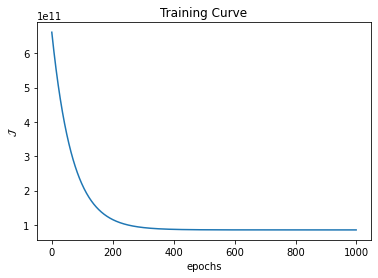

In [583]:
myReg.fit(X_test,y_test, epochs=1e3, eta=1e-12, show_curve=True)

In [584]:
Xtest = np.array([[X_test]])

In [585]:
myReg.predict(Xtest)

array([[[757060.222796  , 758177.17459713, 756883.90209443,
         756968.82588025, 756997.85589925, 757592.37495618,
         757708.30442776, 757303.25695983, 756577.64675278,
         757753.97694458, 756632.84848286, 757913.5976292 ,
         757412.38075716, 757081.16609501, 757149.0902054 ,
         757147.51405449, 757140.84119606, 757112.87094132,
         757864.58273131, 757155.35736985, 757895.59068683,
         757246.25574041, 758234.91076601, 757710.8881601 ,
         757715.57827301, 755814.08463161, 757545.6299884 ,
         757172.58259467, 756259.72314427, 757282.04834369,
         757622.45993044, 756901.37162451, 757044.60097089,
         757421.0394727 , 756533.35381497, 757676.67798972,
         756677.10767923, 758737.21032439, 756895.41716478,
         757449.12665705, 757058.70853599, 756720.70694169,
         756585.4267493 , 757373.48354041, 757740.91836727,
         757634.08996137, 757505.33592352, 757655.02618162,
         756758.99634854, 757314.2539010

In [586]:
y_hatols=myReg.predict(X_test)

In [587]:
R2(y_test,y_hatols)

0.001925213392468872